### import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import json as js
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### import dataset

In [3]:
file_name = "/content/kaggle.json"
with open(file_name, 'r') as f:
    document =  js.loads(f.read())
    
print(document)
#{'key': 'c00046e4b093c67705ca6d402f00aa31', 'username': 'nguynnguynkhoa'}

os.environ['KAGGLE_USERNAME'] = document['username']
os.environ['KAGGLE_KEY'] = document['key']

#get API

{'username': 'nguynnguynkhoa', 'key': '86d54991913d6b87880d297405c8173e'}


In [4]:
!kaggle datasets download -d uciml/adult-census-income

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 67.0MB/s]


In [5]:
!unzip /content/adult-census-income.zip

Archive:  /content/adult-census-income.zip
  inflating: adult.csv               


In [6]:
df = pd.read_csv("/content/adult.csv")

### Problem description

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [11]:
df['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [12]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [14]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [15]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [16]:
df['native.country'].value_counts().head(6)

United-States    29170
Mexico             643
?                  583
Philippines        198
Germany            137
Canada             121
Name: native.country, dtype: int64

In [17]:
df['native.country'].value_counts().sum()-df['native.country'].value_counts().head(6).sum()

1709

In [18]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

#### statistics

In [19]:
# statistics summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [20]:
# check for '?' in dataset
miss_value = df.isin(['?']).sum()
miss_value

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [21]:
miss_value = miss_value/df.shape[0]*100
miss_value

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [22]:
miss_value = miss_value.astype(str) + '%'
miss_value

age                              0.0%
workclass          5.638647461687294%
fnlwgt                           0.0%
education                        0.0%
education.num                    0.0%
marital.status                   0.0%
occupation         5.660145572924664%
relationship                     0.0%
race                             0.0%
sex                              0.0%
capital.gain                     0.0%
capital.loss                     0.0%
hours.per.week                   0.0%
native.country    1.7904855501980899%
income                           0.0%
dtype: object

In [23]:
# checking % label 
income = df['income'].value_counts(normalize=True)
income

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [24]:
income = round(income*100,2).astype(str) + "%"
income

<=50K    75.92%
>50K     24.08%
Name: income, dtype: object

observations

In [25]:
# the dataset doesn't have any null values,but it contains missing value in the form of "?" which need to be preprocessed
# the data is unballanced,as the dependent feature "income" contains 75.92 % values have income less than 50K and 24.08 % values have income  more than 50K

### the exploratory data analyst : Univariate analysis

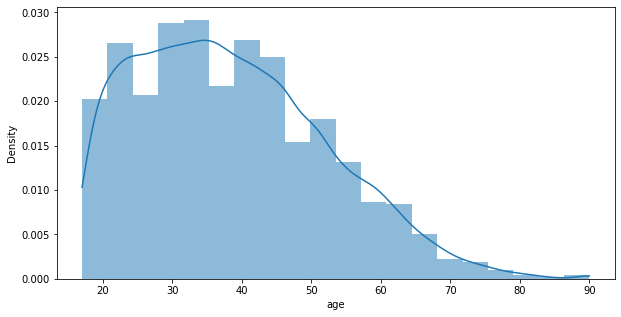

In [26]:
# distribution plot for age
age = df['age'].value_counts()
plt.figure(figsize=(10,5))
sns.histplot(df['age'],kde=True, stat="density", linewidth=0 ,bins=20)
plt.show()

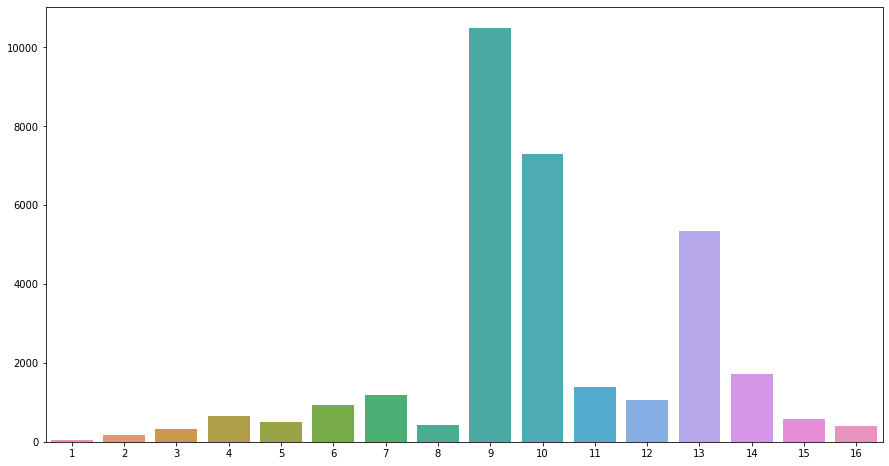

In [27]:
# barplot for year of education
y_of_edu = df['education.num'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=y_of_edu.index,y=y_of_edu.values)
plt.show()

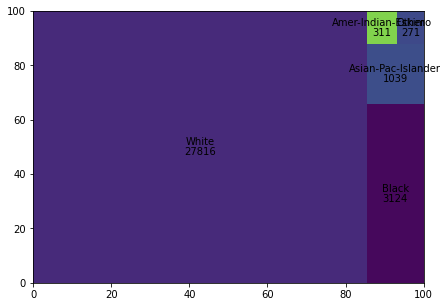

In [28]:
# Tree map for race distribution
!pip install squarify
import squarify as sq
race = df['race'].value_counts()
plt.figure(figsize=(7,5))
sq.plot(sizes=race.values,label=race.index,value=race.values)
plt.show()

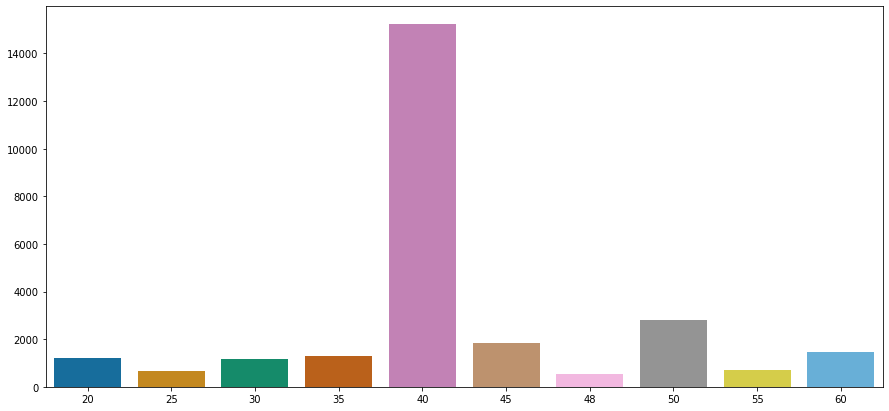

In [29]:
#bar plot of house per week
hours = df['hours.per.week'].value_counts().head(10)
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values, palette='colorblind')
plt.show()

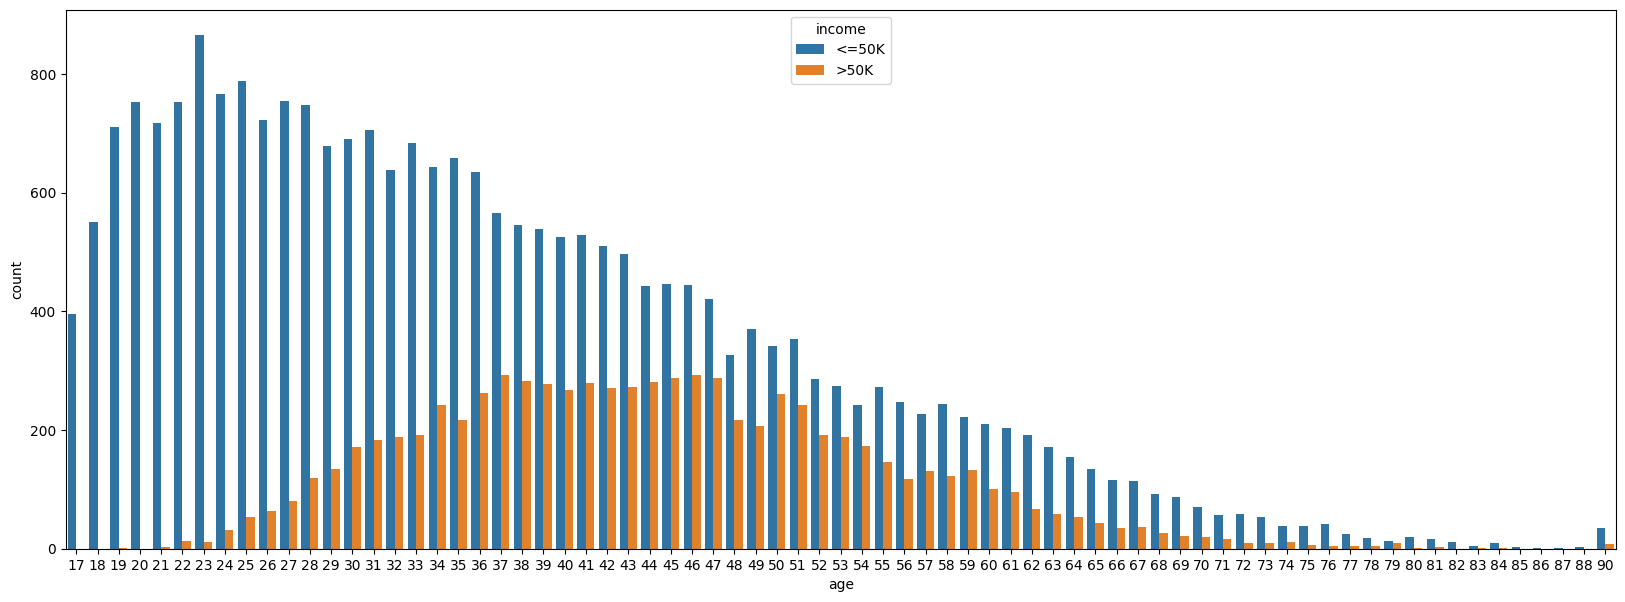

In [30]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income'])
plt.show()

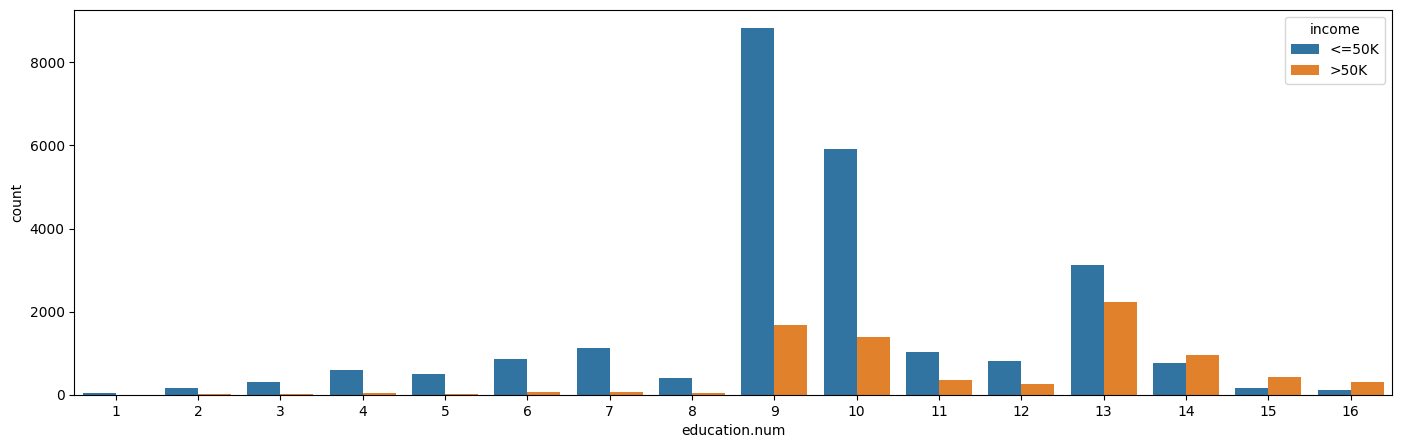

In [31]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(17, 5))
sns.countplot(x=df['education.num'], hue=df['income'])
plt.show()

In [32]:
df['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [33]:
#corr = df.corr()
#ax = sns.heatmap(corr, mask=mask, vmax=.3,annot=True)
#plt.show()

In [34]:
# Fixing '?' values in the dataset
df = df.replace('?', np.nan)
nan_cols = [i for i in df.columns if df[i].isnull().any()]
for col in nan_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [35]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  if df[col].dtypes == 'object':
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [36]:
X = df.iloc[:, :-1]

In [37]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [38]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38


In [39]:
Y = df[df.columns[-1:]]

In [40]:
Y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,1
32559,0


In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
for col in X.columns:
  scaler = StandardScaler()
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [42]:
round(Y.value_counts(normalize=True) * 100, 2).astype(str) + "%"

income
0         75.92%
1         24.08%
dtype: object

In [43]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros.fit(X,Y.values)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

RandomOverSampler(random_state=42, ratio=None, return_indices=False,
                  sampling_strategy='auto')

In [44]:
X_resampled, Y_resampled = ros.fit_resample(X,Y.values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [45]:
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)

In [46]:
X_resampled.shape

(49440, 14)

In [47]:
Y_resampled = pd.DataFrame(Y_resampled, columns=Y.columns)
Y_resampled.head()

,income
0,0
1,0
2,0
3,0
4,0


In [48]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype(str) + "%"

income
1         50.0%
0         50.0%
dtype: object

### train model

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,Y_resampled,test_size= 0.2,random_state=101)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39552, 14)
(9888, 14)
(39552, 1)
(9888, 1)


logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=101)

In [54]:
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred_log_reg = log_reg.predict(X_test)

KNN classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
y_pred_knn = knn.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [65]:
print("LogisticRegression")
print("accuracy",round(accuracy_score(y_test,y_pred_log_reg)*100,2))
print("f1",round(f1_score(y_test,y_pred_log_reg)*100,2))

LogisticRegression
accuracy 76.8
f1 76.63


In [66]:
print("KNeighborsClassifier")
print("accuracy",round(accuracy_score(y_test,y_pred_knn)*100,2))
print("f1",round(f1_score(y_test,y_pred_knn)*100,2))

KNeighborsClassifier
accuracy 83.68
f1 84.6
